<a href="https://colab.research.google.com/github/gg-nogueira/ML_case_accidents/blob/main/case_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desafio**

##*Prever a ocorrência de algum ferimento em um acidente de carro.*

#**Instruções**:

1. Coleta e tratamento de dados.

2. Modelagem:

  a) Aplique um algoritmo de Regressão Linear para prever a ocorrência de ferimento em um acidente de carro.
    
  b) Aplique outro modelo, de sua escolha.
    
  c) Escolha e aplique métricas para avaliação dos modelos. Explique.

3. Visualização e Interpretação:

  a) Gere gráficos relevantes.

  b) Explique o que os gráficos indicam e discuta se os modelos são confiáveis para ajudar na tomada de decisões.

4. Limitações e Melhorias:

  a) Discuta as limitações dos modelos que você criou.
  
  b) Sugira melhorias possíveis.

#**Entrega**:

1. Um notebook Python (.ipynb) com o código completo.
2. Um relatório explicando os resultados obtidos e as limitações do modelo.
3. Não se esqueça de analisar os resultados obtidos!



#**Atributos**




Rush Hour,"1=rush hour, 0=not (rush = 6-9 am, 4-7 pm)

Alcohol Involved,"Alcohol involved = 1, not involved = 0"

Work Zone,"1= yes, 0= no"

Align,"1=straight, 2=curve",,,,,

Weekday,"1=weekday, 0=weekend",,,,,

Accident at Intersection,"1=accident at intersection/interchange, 0=not at intersection"

Accident at Roadway,"1=accident on roadway, 0=not on roadway"

Speed Limit,"Speed limit, miles per hour"

Number of Vehical Involved,Number of vehicles involved

Weather,"No=no adverse conditions, Yes=rain, snow or other adverse condition"

Injury,"1=yes, 2= no"






#Coleta e tratamento de dados

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns



In [ ]:
# Transformei os dados em csv para facilitar o manuseio
path='/content/Data_-_Case_Dados.csv'
df=pd.read_csv(path)

In [ ]:
df.head()

,Rush Hour,Alcohol Involved,Align,Work Zone,Weekday,Accident at Intersection,Accident at Roadway,Speed Limit,Number of Vehical Involved,Weather,Injury
0,0,0,2,0,1,1,0,40,1,No,1
1,1,0,1,0,1,1,1,70,2,Yes,2
2,1,0,1,0,1,1,1,35,2,Yes,2
3,1,0,1,0,0,1,1,35,2,No,2
4,1,1,1,0,1,0,1,25,3,No,2


In [ ]:
# Verificação de valores nulos
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42183 entries, 0 to 42182
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Rush Hour                   42183 non-null  int64 
 1   Alcohol Involved            42183 non-null  int64 
 2   Align                       42183 non-null  int64 
 3   Work Zone                   42183 non-null  int64 
 4   Weekday                     42183 non-null  int64 
 5   Accident at Intersection    42183 non-null  int64 
 6   Accident at Roadway         42183 non-null  int64 
 7   Speed Limit                 42183 non-null  int64 
 8   Number of Vehical Involved  42183 non-null  int64 
 9   Weather                     42183 non-null  object
 10  Injury                      42183 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 3.5+ MB


Index(['Rush Hour', 'Alcohol Involved', 'Align', 'Work Zone', 'Weekday',
       'Accident at Intersection', 'Accident at Roadway', 'Speed Limit',
       'Number of Vehical Involved', 'Weather', 'Injury'],
      dtype='object')

In [ ]:
df.dtypes

,0
Rush Hour,int64
Alcohol Involved,int64
Align,int64
Work Zone,int64
Weekday,int64
Accident at Intersection,int64
Accident at Roadway,int64
Speed Limit,int64
Number of Vehical Involved,int64
Weather,object


In [ ]:
# Converter colunas categóricas para padronização
df['Weather'] = df['Weather'].map({'Yes': 1, 'No': 0})
df['Align'] = df['Align'].map({2: 1, 1: 0})
df['Injury'] = df['Injury'].map({2: 1, 1: 0})

df.head()

,Rush Hour,Alcohol Involved,Align,Work Zone,Weekday,Accident at Intersection,Accident at Roadway,Speed Limit,Number of Vehical Involved,Weather,Injury
0,0,0,1,0,1,1,0,40,1,0,0
1,1,0,0,0,1,1,1,70,2,1,1
2,1,0,0,0,1,1,1,35,2,1,1
3,1,0,0,0,0,1,1,35,2,0,1
4,1,1,0,0,1,0,1,25,3,0,1


# EDA

In [ ]:
df.dtypes

,0
Rush Hour,int64
Alcohol Involved,int64
Align,int64
Work Zone,int64
Weekday,int64
Accident at Intersection,int64
Accident at Roadway,int64
Speed Limit,int64
Number of Vehical Involved,int64
Weather,int64


In [ ]:
df["Injury"].value_counts()

,count
Injury,
1,21187
0,20996


In [ ]:
df["Injury"].value_counts(normalize=True)

,proportion
Injury,
1,0.502264
0,0.497736


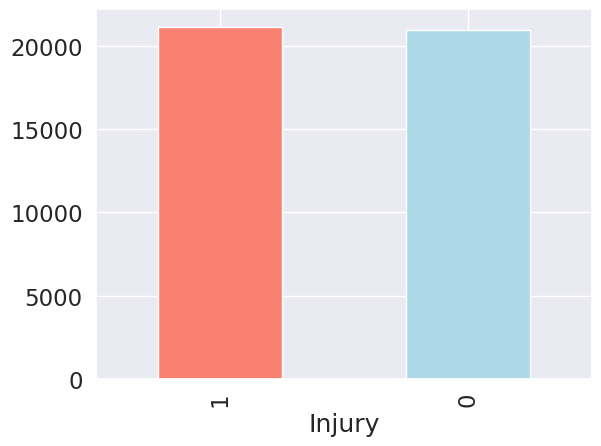

In [ ]:
df["Injury"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);


In [ ]:
df.columns

Index(['Rush Hour', 'Alcohol Involved', 'Align', 'Work Zone', 'Weekday',
       'Accident at Intersection', 'Accident at Roadway', 'Speed Limit',
       'Number of Vehical Involved', 'Weather', 'Injury'],
      dtype='object')

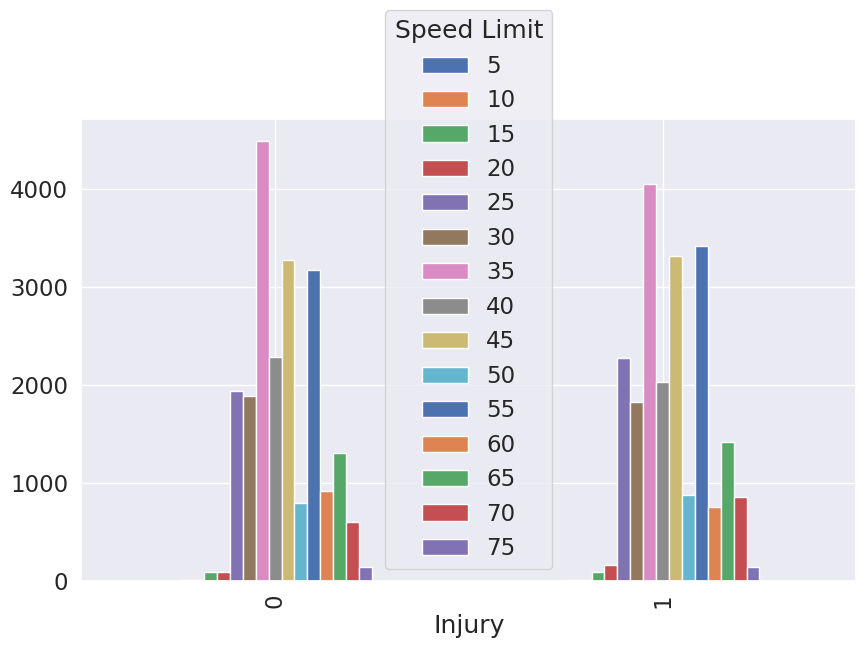

In [ ]:
pd.crosstab(df["Injury"],df["Speed Limit"]).plot(kind="bar",figsize=(10,6));

# Modelagem


#Aplicação do algoritmo de Regressão Linear para prever a ocorrência de ferimento em um acidente de carro.

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Definir variáveis independentes (X) e dependentes (y)
X = df.drop('Injury', axis=1)  # Excluir a coluna 'Injury' de X
y = df['Injury']  # A variável dependente será 'Injury'

In [ ]:
X.head()

,Rush Hour,Alcohol Involved,Align,Work Zone,Weekday,Accident at Intersection,Accident at Roadway,Speed Limit,Number of Vehical Involved,Weather
0,0,0,1,0,1,1,0,40,1,0
1,1,0,0,0,1,1,1,70,2,1
2,1,0,0,0,1,1,1,35,2,1
3,1,0,0,0,0,1,1,35,2,0
4,1,1,0,0,1,0,1,25,3,0


In [ ]:
y.head()

,Injury
0,0
1,1
2,1
3,1
4,1


In [ ]:
#Divisão entre Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(33746, 33746, 8437, 8437)

In [ ]:
# Criando o modelo de regressão linear
from sklearn import datasets, linear_model # constroi a Regrassão linear
from sklearn.metrics import mean_squared_error, r2_score # performance do modelo

regr = linear_model.LinearRegression()

# Treinando o modelo com os dados de treino
regr.fit(X_train, y_train)

# Realizando as previsões no conjunto de teste
y_pred = regr.predict(X_test)

# Prevendo resultados
# Mostrando os coeficientes e o intercepto
print('Coeficients:', regr.coef_) # Colunas da tabela X e seus impactos em Injury
print('Interseção:', regr.intercept_) # Valor previsto de Injury quando todas as colunas X são zero
print('Erro Quadrático Médio (MSE): %.2f' # Erro médio ao quadrado // Quanto menor, melhor o modelo.
      % mean_squared_error(y_test, y_pred))
print('Coeficiente de determinação (R^2): %.2f' # 1- previsão perfeita // 0- não explica nada // <0- pior do que usar a média
      % r2_score(y_test, y_pred))

Coeficients: [-0.00402485 -0.08286817 -0.02318632  0.03280484  0.02497014 -0.03417565
 -0.00736641 -0.00011345 -0.0378894   0.05628856]
Interseção: 0.5829767601579476
Erro Quadrático Médio (MSE): 0.25
Coeficiente de determinação (R^2): 0.01


In [ ]:
# Nomes das colunas do conjunto X
columns_X = ['Rush Hour', 'Alcohol Involved', 'Align', 'Work Zone',
             'Weekday', 'Accident at Intersection', 'Accident at Roadway',
             'Speed Limit', 'Number of Vehicle Involved', 'Weather']

# Coeficientes do modelo
coefficients = [-0.00402485, -0.08286817, -0.02318632, 0.03280484,
                0.02497014, -0.03417565, -0.00736641, -0.00011345,
                -0.0378894, 0.05628856]

# Dicionário para agrupar
coeff_dict = {columns_X[i]: coefficients[i] for i in range(len(columns_X))}

# Convertendo para um DataFrame para exibir como matriz
coeff_df = pd.DataFrame(list(coeff_dict.items()), columns=['Coluna X', 'Coeficiente'])
print(coeff_df)

                     Coluna X  Coeficiente
0                   Rush Hour    -0.004025
1            Alcohol Involved    -0.082868
2                       Align    -0.023186
3                   Work Zone     0.032805
4                     Weekday     0.024970
5    Accident at Intersection    -0.034176
6         Accident at Roadway    -0.007366
7                 Speed Limit    -0.000113
8  Number of Vehicle Involved    -0.037889
9                     Weather     0.056289


In [ ]:
r2_score(y_test, y_pred) # possível notar baixa performance

0.009232048560764539

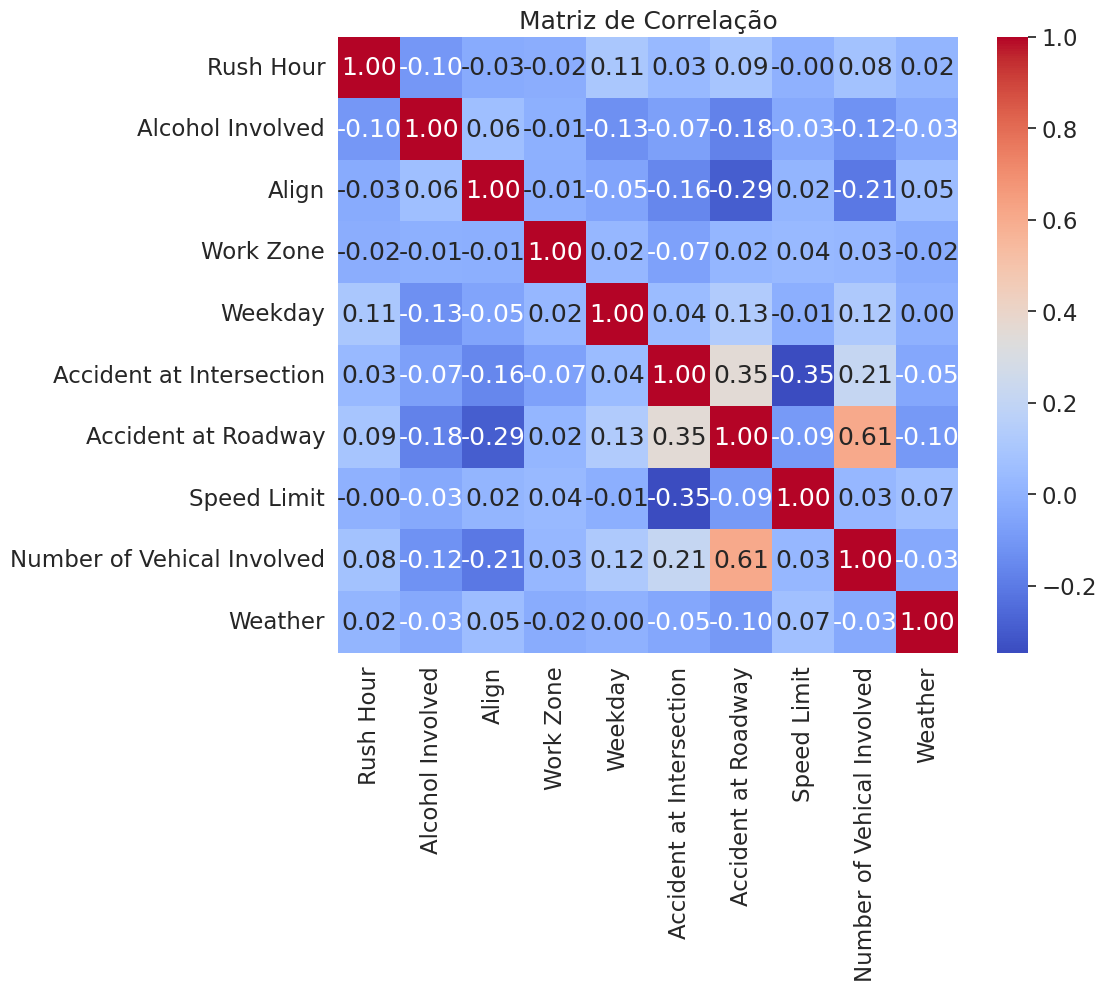

In [ ]:
# Calculando a matriz de correlação
corr_matrix = X_train.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show() # possível notar baixa precisão




##Ao avaliar as métricas do algoritmo de Regressão Linear e ao gráfico da Matriz de Correlação, podemos extrair as seguintes limitações e melhorias:


1.   O valor do Coeficiente de Determinação (R²) obtido foi de 0.01, o que indica que o modelo explica apenas 1% da variação dos ferimentos nos acidentes de carro.
2.   O erro quadrático médio (MSE) foi de 0.25. A princípio, um valor baixo assim pode indicar uma boa performance do modelo, mas ao combiná-lo com o Coeficiente de Determinação baixo indica que as previsões feitas não são precisas
3. Os baixos coeficientes indicam que, segundo o modelo, as variáveis não tem grande influência na previsão da variável dependente (Injury), sendo isto claro quando vemos métricas como Alcohol Involved, que comprovadamente pioram a capacidade cognitiva do condutor, não causando aumento do número de acidentes ao analisar o gráfico
4. Como sugestão de melhoria, é indicado utilizar outros algoritmos de ML que lidem melhor com dados não lineares, como é o caso do K-Nearest Neighbors, Random Forest Classifier ou Logistic Regression

##Conclui-se, portanto, que este algoritmo não é o ideal para este tipo de cenário.


#Aplicação de outro algoritmo de machine learning

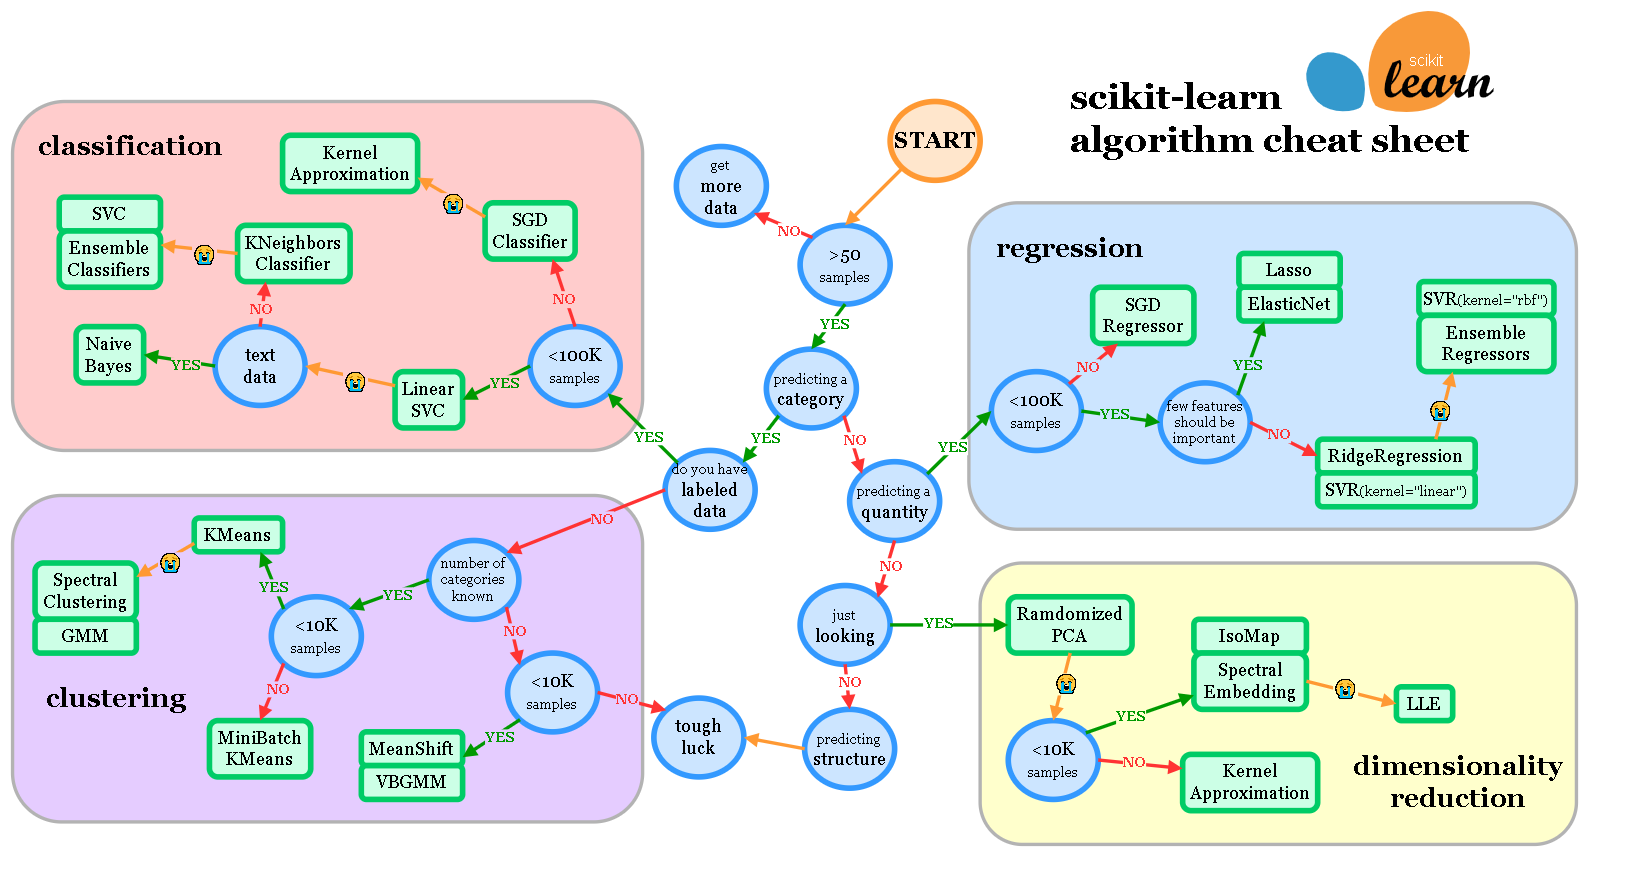

In [ ]:
from PIL import Image

Image.open('/content/ml_map.png')

# Após análise do mapa acima, é possível notar que o próximo modelo sugerido para aplicar neste caso é o KNeighbors Classifier
###Fonte: https://scikit-learn.org/stable/machine_learning_map.html


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Normalizando os dados (opcional, mas recomendado para o KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lista para armazenar o score de treino
train_scores = []

# Lista para armazenar o score de teste
test_scores = []

# Lista com diferentes valores para "n_neighbors" vamos começar com 1 e subir até 20
neighbors = range(1, 21)

# Instanciando o KNN
knn = KNeighborsClassifier()

# Loop para aplicar os diferentes valores em "n_neighbors"
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # Treina o modelo
    knn.fit(X_train, y_train)

    # Guarda o score de treino
    train_scores.append(knn.score(X_train, y_train))

    # Armazena o score de teste
    test_scores.append(knn.score(X_test, y_test))
# Previsões
y_pred = knn.predict(X_test)

# Avaliação
print(f"Acurácia: {round(accuracy_score(y_test, y_pred)*100, 2)}%", )
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 56.12%
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.55      0.64      0.59      4147
           1       0.58      0.49      0.53      4290

    accuracy                           0.56      8437
   macro avg       0.56      0.56      0.56      8437
weighted avg       0.56      0.56      0.56      8437



Desempenho máximo de KNN nos dados de teste: 56.56%


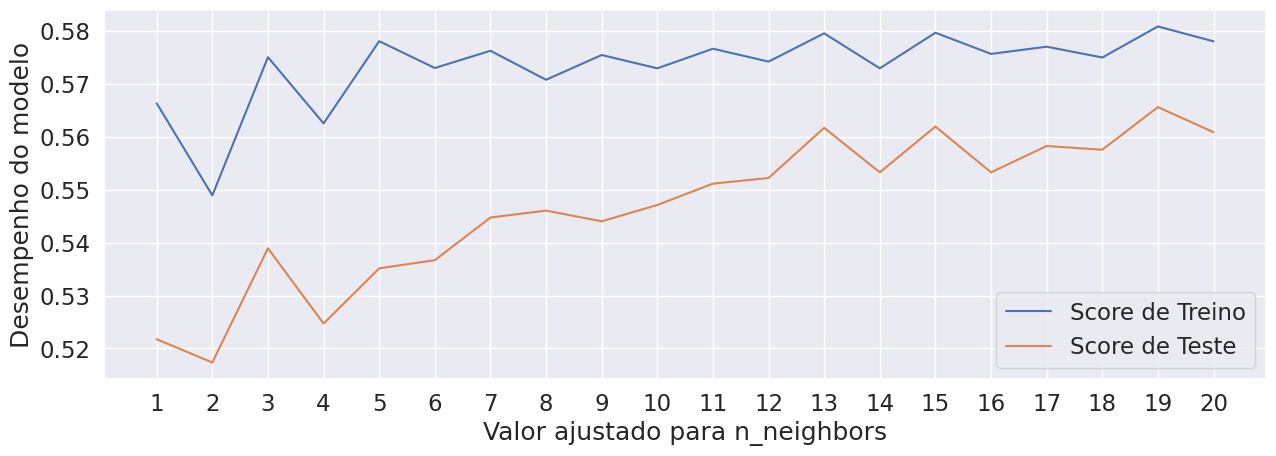

In [ ]:
plt.figure().set_figwidth(15)
plt.plot(neighbors, train_scores, label="Score de Treino")
plt.plot(neighbors, test_scores, label="Score de Teste")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Valor ajustado para n_neighbors")
plt.ylabel("Desempenho do modelo")
plt.legend()

print(f"Desempenho máximo de KNN nos dados de teste: {max(test_scores)*100:.2f}%")



##Ao avaliar as métricas do algoritmo K-Nearest Neighbors e ao gráfico do desempenho em comparação com o valor ajustado para n_neighbors, podemos extrair as seguintes limitações e melhorias:


1. A acurácia de 56.09% indica que o modelo acertou pouco mais da metade das previsões, ainda apresentando alguns erros significativos, especialmente quando comparado com a complexidade dos dados.
2. O modelo apresenta uma performance balanceada nas métricas gerais, demonstrando ter um desempenho razoável para as duas classes, e permitindo margem de aprimoramento no que tange à previsão de ferimentos
3. Ao aumentarmos o valor n_neighbors, o desempenho do modelo aumenta em detrimento da performance computacional de processamento dos dados
4. O ponrto central do KNN está no n_neighbors, assim, como sugestão de melhoria seria possível aplicar o KNN Ponderado, que leva em consideração a distância dos vizinhos mais próximos ao fazer a predição final, de modo que os  mais próximos recebem um peso maior do que os mais distantes



##Conclui-se, portanto, que este algoritmo apresentou uma melhora significativa com relação ao anterior
